<a href="https://colab.research.google.com/github/b62mp1/files/blob/main/Arima_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
pip install yfinance

[*********************100%***********************]  1 of 1 completed
Number of rows and columns: (578, 7)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed
Number of rows and columns: (578, 7)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed
Number of rows and columns: (578, 7)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed
Number of rows and columns: (578, 7)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed
Number of rows and columns: (578, 7)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

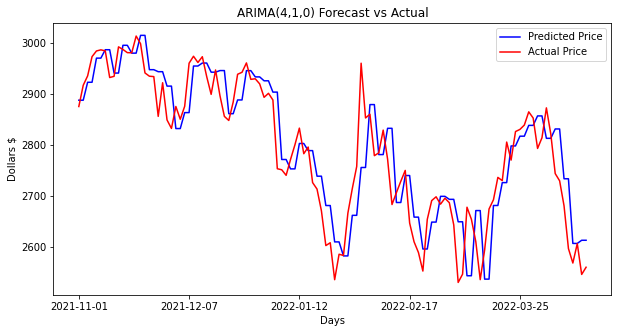

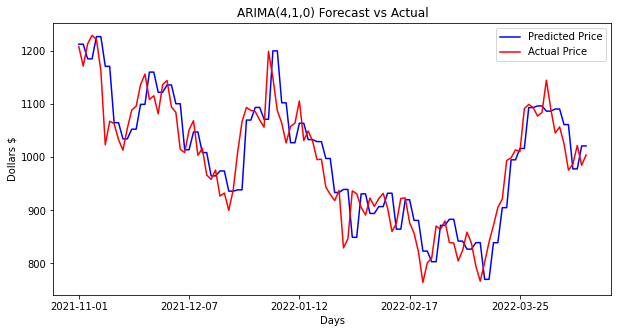

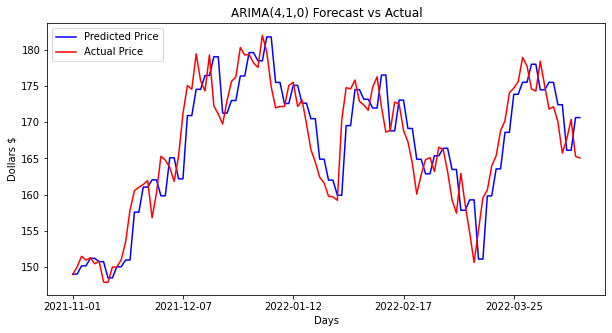

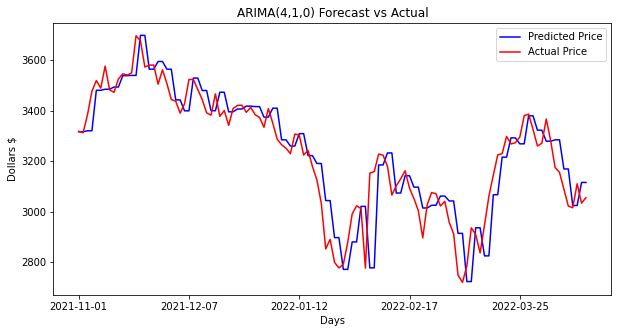

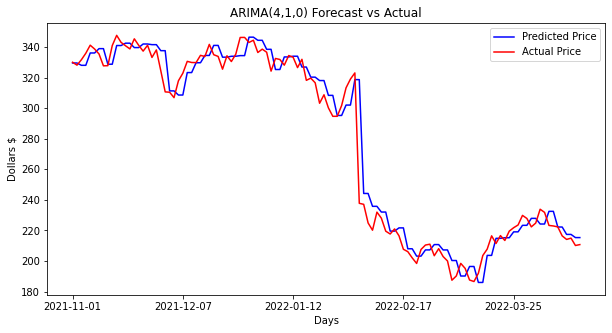

In [103]:
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
from google.colab import files
import math
from sklearn.metrics import mean_squared_error, r2_score
yf.pdr_override()

ls = []
stock_names = ["GOOG", "TSLA", "AAPL", "AMZN", "FB"]

for stock_name in stock_names:
  df=pdr.get_data_yahoo(stock_name, start='2020-01-01', end='2022-04-19').reset_index()
  print("Number of rows and columns:", df.shape)
  df.head(5)
  series = df['Close']

  # Create train data set
  ind = df['Date'][int(0.80 * len(df['Date'].values))]
  train_split_date = ind
  train_split_index = np.where(df.Date == train_split_date)[0][0]
  x_train = df.loc[df['Date'] <= train_split_date]['Close']

  # Create test data set
  test_split_date = ind
  test_split_index = np.where(df.Date == test_split_date)[0][0]
  x_test = df.loc[df['Date'] >= test_split_date]['Close']

  dates = df.loc[df['Date'] >= test_split_date]['Date']

  # Create valid data set (Here we are not using it))

  valid_split_index = (train_split_index.max(),test_split_index.min())
  x_valid = df.loc[(df['Date'] < test_split_date) & (df['Date'] > train_split_date)]['Close']

  from statsmodels.tsa.arima_model import ARIMA

  # Create list of x train valuess
  history = [x for x in x_train]

  # establish list for predictions
  model_predictions = []

  count = 0
  # loop through every data point
  for time_point in list(x_test.index[:]):
      model = ARIMA(history, order=(4,1,0))
      model_fit = model.fit(disp=0)
      if(count % 2 == 0):
        output = model_fit.forecast()
      yhat = output[0]
      model_predictions.append(yhat)
      true_test_value = x_test[time_point]
      history.append(true_test_value)
      count += 1
          
  from datetime import datetime
  date = [str(d)[:10] for d in dates[:]]
  #date
  # Plot our predictions against the actual values for a visual comparison.
  plt.figure(figsize=(10,5))

  plt.plot(x_test.index[:], model_predictions[:], color='blue',label='Predicted Price')
  plt.plot(x_test.index[:], x_test[:], color='red', label='Actual Price')
  plt.ylabel('Dollars $')
  plt.xlabel('Days')
  plt.title('ARIMA(4,1,0) Forecast vs Actual')
  #plt.xticks(x_test.index[-50:], date)
  plt.xticks( x_test.index[::25], date[::25])
  plt.legend()

  file_name = 'ARIMA_' + stock_name
  plt.savefig(file_name + '.png')
  files.download(file_name + '.png')

  mse = mean_squared_error(x_test, model_predictions)
  rmse = math.sqrt(mse)
  r2score = r2_score(x_test, model_predictions)
  ls.append([stock_name, mse, rmse, r2score])

values = pd.DataFrame(ls, columns=['Stock Name', 'MSE', 'RMSE', 'R2 Score'])
values.to_csv(file_name + '.csv', index = False)
files.download(file_name + '.csv')
